In [1]:
import pandas as pd
import numpy as np

In [2]:
fin = open('data_train.csv')

featname = fin.readline().strip().split(',')
#Load the maximum index
maxID = {}
finID = open('maxID.txt')
for line in finID:
    i,id = line.strip().split('\t')
    maxID[featname[int(i)]] = int(id) + 1
maxID

{'adnw_id': 36,
 'adspot_id': 1106,
 'advertiser_id': 2166,
 'campaign_id': 11803,
 'category_id': 7204,
 'frequency': 10,
 'game_feed_id': 33598,
 'is_app': 2,
 'last_login_interval': 2349757,
 'last_paid_interval': 1053268596,
 'logged_at': 1,
 'media_id': 89765,
 'uid': 3691112,
 'user_type_id': 5}

In [3]:
train = pd.read_csv("data_train.csv")
train

,logged_at,advertiser_id,campaign_id,category_id,adnw_id,adspot_id,uid,frequency,user_type_id,media_id,is_app,last_login_interval,last_paid_interval,game_feed_id,click
0,2018-03-15 00:00:00.125,1909,7942,0,10,1087,0,3,1,0,1,5018.0,NaN,26118,0
1,2018-03-15 00:00:06.991,1909,7948,0,8,1023,20,5,2,20,1,26361.0,NaN,26122,0
2,2018-03-15 00:00:13.584,1898,7856,0,20,1056,40,7,2,36,1,1963.0,NaN,33487,0
3,2018-03-15 00:00:18.50,1999,9827,0,10,1030,60,0,2,51,1,181157.0,242672.0,30427,0
4,2018-03-15 00:00:22.753,1935,11138,0,10,1030,80,6,2,40,1,22636.0,56118.0,30139,0
5,2018-03-15 00:00:27.552,1930,11382,0,10,1030,100,9,1,52,1,1539.0,NaN,33261,0
6,2018-03-15 00:00:29.917,2088,10668,0,4,1007,109,7,1,83,0,22507.0,NaN,33071,1
7,2018-03-15 00:00:32.027,1637,8632,0,10,1059,120,1,1,3,1,534.0,105530.0,17065,0
8,2018-03-15 00:00:37.89,1867,7628,0,10,1030,140,0,2,103,1,1178669.0,NaN,27234,0
9,2018-03-15 00:00:44.301,2133,11471,0,4,1007,160,3,1,118,1,NaN,NaN,32618,0


In [64]:
y_train = train["click"]
adv_id = train["advertiser_id"]
uid = train["uid"]
utype = train["user_type_id"]
frequency = train["frequency"]
interval = train["last_paid_interval"]
is_app = train["is_app"]
new_df = pd.concat([adv_id, uid,frequency], axis=1)
X_train = np.matrix(new_df)

print(len(uid), len(y_train))

1816568 1816568


In [78]:
def tobinary(e):
    if(e > 1):
        return 1
    else:
        return 0
fre = list(map(tobinary, frequency))
fre

l = {"1":[],"0":[]}
for f, y in zip(frequency, y_train):
    if(y == 1):
        l["1"].append(f)
    else:
        l["0"].append(f)
l["1"]

[7,
 0,
 0,
 2,
 -1,
 0,
 0,
 0,
 8,
 8,
 4,
 0,
 0,
 3,
 2,
 0,
 1,
 4,
 2,
 9,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 3,
 0,
 0,
 4,
 6,
 0,
 0,
 1,
 2,
 7,
 0,
 0,
 0,
 4,
 0,
 2,
 0,
 6,
 4,
 2,
 6,
 2,
 0,
 0,
 2,
 3,
 5,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 6,
 0,
 2,
 1,
 4,
 2,
 1,
 0,
 -1,
 2,
 3,
 0,
 1,
 5,
 0,
 0,
 2,
 2,
 5,
 0,
 0,
 9,
 4,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 4,
 0,
 9,
 3,
 2,
 0,
 0,
 4,
 8,
 4,
 1,
 0,
 1,
 0,
 1,
 4,
 6,
 0,
 6,
 8,
 0,
 2,
 0,
 4,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 3,
 9,
 3,
 7,
 0,
 0,
 5,
 5,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 5,
 3,
 6,
 2,
 5,
 0,
 3,
 0,
 0,
 8,
 0,
 0,
 1,
 1,
 0,
 0,
 9,
 2,
 0,
 4,
 0,
 4,
 0,
 5,
 0,
 3,
 0,
 9,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 7,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 3,
 0,
 7,
 0,
 0,
 0,
 1,
 7,
 1,
 7,
 6,
 1,
 0,
 3,
 3,
 0,
 1,
 0,
 8,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 5,
 3,
 1,
 0,
 3,
 1,
 1,
 1,
 2,
 0,
 6

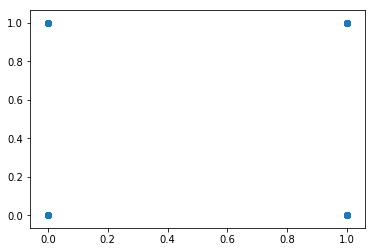

In [70]:
import matplotlib.pyplot as plt

plt.scatter(fre, y_train)
plt.show()


In [8]:
def ids_to_onehot(ids, n_labels):
    return np.eye(n_labels)[ids]

dic = {}
for u in uid:
    if(u in dic.keys()):
        dic[u] += 1
    else:
        dic[u] = 1
len(dic.keys())

1044427

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
test = pd.read_csv('data_test.csv')




In [19]:
adv_id = test["advertiser_id"]
uid = test["uid"]
frequency = test["frequency"]
X_test = np.matrix(pd.concat([adv_id, uid,frequency], axis=1))

In [41]:
y_pred = clf.predict_proba(X_test)

array([[0.9, 0.1]])

In [42]:
y_pred = y_pred[:,0]

In [52]:
f = open('submit.dat', 'w') # 書き込みモードで開く
y_pred = list(map(str, y_pred))
for p in y_pred:
    f.writelines(p + "\n") # シーケンスが引数。
f.close()